# Introduction to Network Analysis and Named Entity Recognition (NER)

This is a notebook to help you experiment with network analysis and named entity recognition (NER) using Python. The goal is to provide a simple introduction to these topics and to show how they can be combined to analyze unstructured textual data.

## Load Libraries & Datasets

Before running this code, make sure you have installed the required libraries in your virtual environment. You can install them using the following commands:

```bash
pip install pandas networkx tqdm matplotlib
```


In [7]:
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from tqdm import tqdm

## Creating Networks in Python

One of the primary libraries for creating networks in Python is `networkx`. It is a powerful tool that allows you to create, manipulate, and analyze complex networks. In this notebook, we will use `networkx` to create and manipualte networks.

First, we'll download some pre-created networks data to explore how networks can be created and analyzed. We'll use Melanie Walsh's sample networks datasets [https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/game-of-thrones](https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/game-of-thrones), and specifically the dataset that is derived from the Game of Thrones series.

In [2]:
nodes_df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/game-of-thrones/got-nodes.csv")
edges_df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/game-of-thrones/got-edges.csv")

In [3]:
nodes_df.head()

,Id,Label
0,Aemon,Aemon
1,Grenn,Grenn
2,Samwell,Samwell
3,Aerys,Aerys
4,Jaime,Jaime


In [4]:
edges_df.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


You'll notice that the `nodes_df` dataframe contains information about the characters in the Game of Thrones series, including their names and the house they belong to. The `edges_df` dataframe contains information about the relationships between the characters, including the source and target characters and the type of relationship.

In [5]:
G = nx.from_pandas_edgelist(edges_df, source='Source', target='Target', edge_attr='Weight')

In this code, we are using the `from_pandas_edgelist` method that is built into networkx to create a graph from a pandas dataframe. We can see the documentation for this method [here](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html).

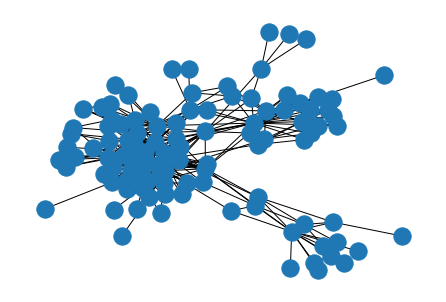

In [6]:
nx.draw(G)

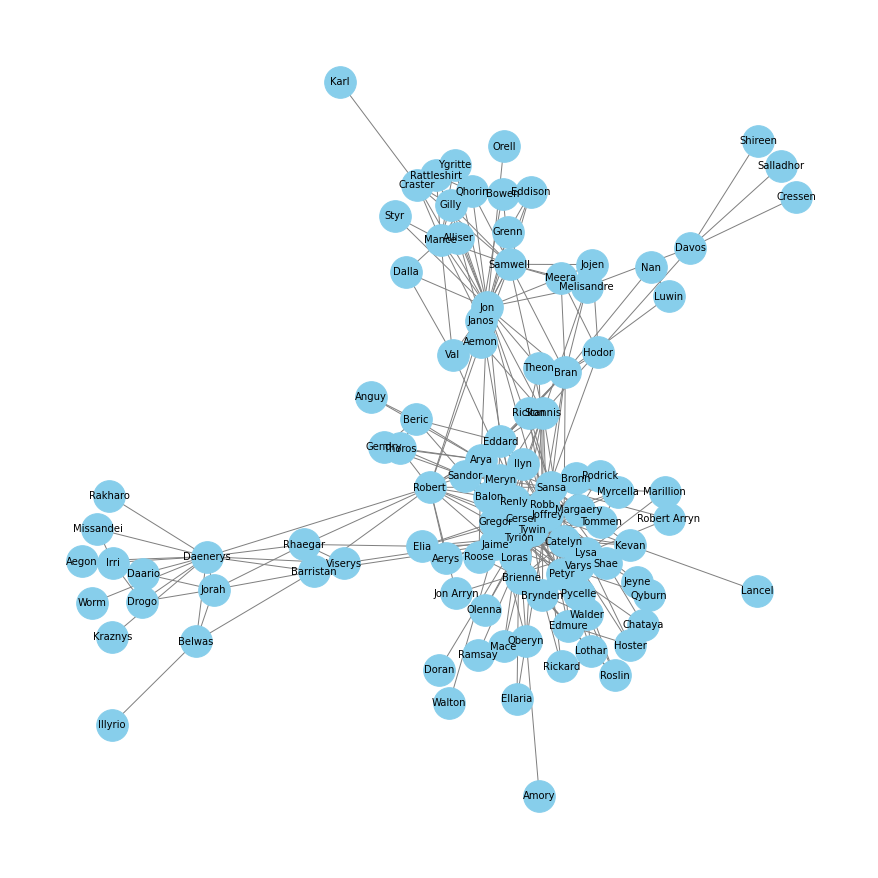

In [8]:
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_size=10, node_size=1000, node_color='skyblue', edge_color='gray')
plt.show()

Now that we have a network, we can start analyzing it. We can calculate the degree of each node, which is the number of connections that a node has. We can also calculate the degree centrality, which is the fraction of nodes that a node is connected to. We can use these metrics to identify the most important nodes in the network.

In [9]:
# Calculate degree and betweenness centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create dataframes from the centrality measures
degree_df = pd.DataFrame(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'Degree Centrality'])
betweenness_df = pd.DataFrame(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'Betweenness Centrality'])

# Print the top five nodes for each measure
print("Degree Centrality")
print(degree_df.head(5))
print("\nBetweenness Centrality")
print(betweenness_df.head(5))

Degree Centrality
     Node  Degree Centrality
0  Tyrion           0.339623
1     Jon           0.245283
2   Sansa           0.245283
3    Robb           0.235849
4   Jaime           0.226415

Betweenness Centrality
       Node  Betweenness Centrality
0       Jon                0.229965
1    Robert                0.209452
2    Tyrion                0.197913
3  Daenerys                0.157203
4      Robb                0.126964


We can now size our nodes based on their degree centrality, which will make the most important nodes larger and easier to see. We can also color the nodes based on their house, which will help us identify the different groups in the network.

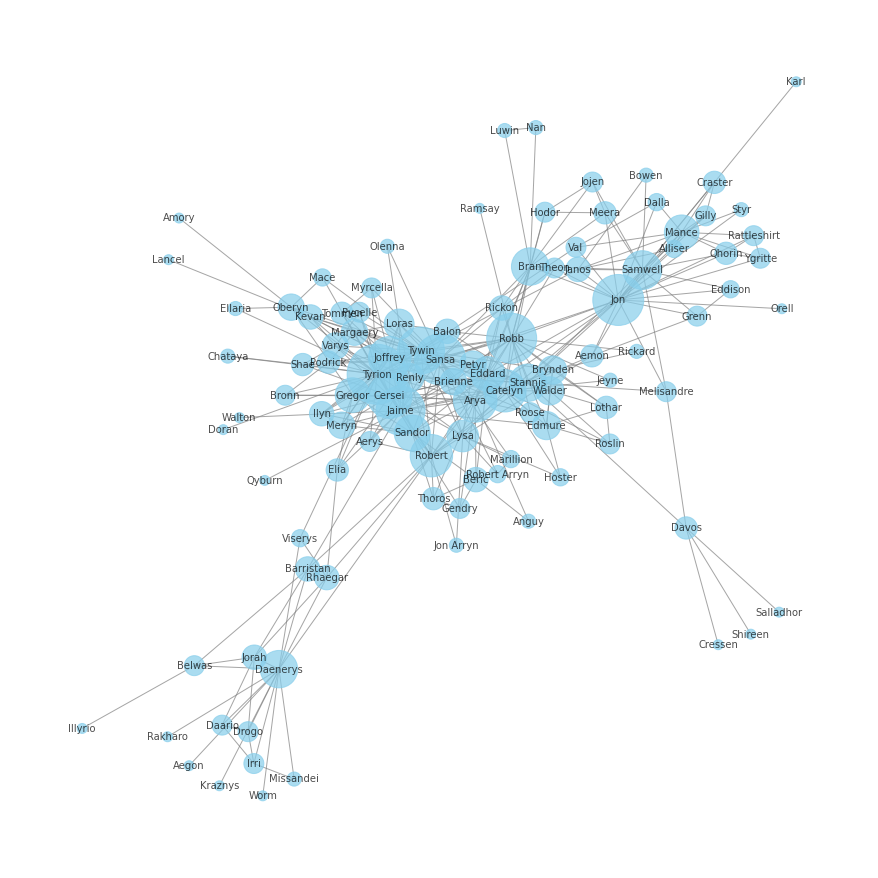

In [10]:
# Visualize network with degree centrality as node size
plt.figure(figsize=(12, 12))
node_size = [G.degree(v) * 100 for v in G]
nx.draw(G, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
plt.show()

We can do the same type of visualization for betweenness centrality, which measures the number of shortest paths that pass through a node. This metric is useful for identifying nodes that act as bridges between different parts of the network.

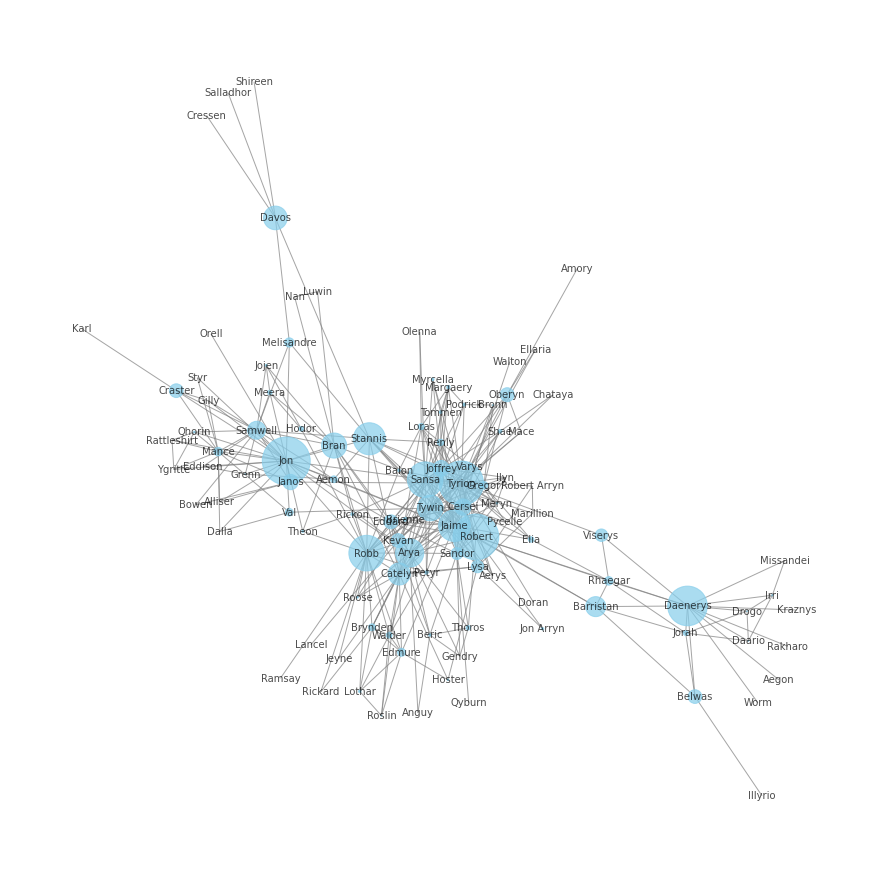

In [11]:
# Visualize network with betweenness centrality as node size
plt.figure(figsize=(12, 12))
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw(G, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
plt.show()

We can also start to explore communities within the network to get a sense of how the characters are grouped together. We can use the Louvain method to detect communities in the network. The Louvain method is a popular community detection algorithm that is based on modularity optimization. We can use the `community_louvain` method from the `community` library to detect communities in the network.

Finally, we can visualize the network using the `matplotlib` library. We can use the `draw` method from networkx to draw the network, and we can use the `spring_layout` method to lay out the nodes in a visually appealing way.

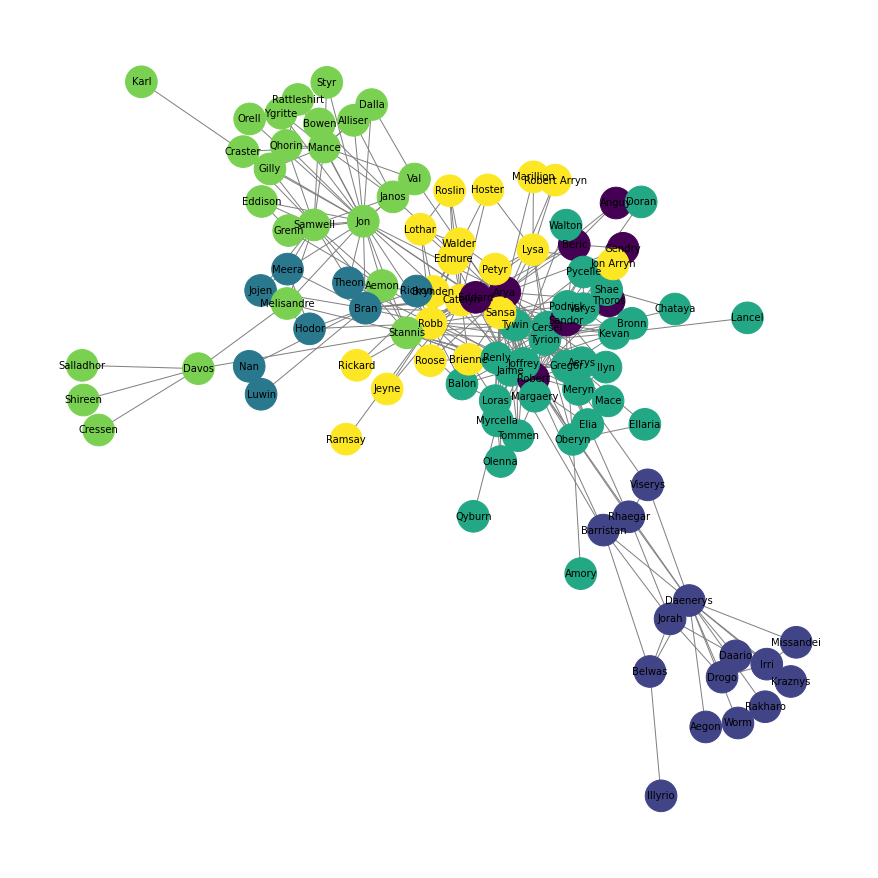

In [12]:
# Compute the best partition
communities = community.louvain_communities(G, seed=123)

# Create a dictionary that maps each node to its community
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i

# Create a list of colors based on the community of each node
colors = [community_map[node] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G,  node_color=colors, with_labels=True, font_size=10, node_size=1000, edge_color='gray')
plt.show()

## Creating Network Data From Text

Rather than just using pre-made datasets, we can also create our own using the film Pudding's film dialogue datasets, that I've load below. I've updated our previous pudding dataset and you can download the new version here [https://drive.google.com/file/d/1GzlhBRYvY-IhfokHYP1XfkPx_Njh2cFN/view?usp=sharing](https://drive.google.com/file/d/1GzlhBRYvY-IhfokHYP1XfkPx_Njh2cFN/view?usp=sharing).

In [13]:
film_scripts_df = pd.read_csv('revised_categorized_pudding_public_scripts.csv')
character_list_df = pd.read_csv('character_list5.csv', encoding='ISO-8859-1')

In [14]:
film_scripts_df.head()

,imdb_id,script_id,title,year,gross_ia,link,revised_link,status_code,script,script_length,predominant_character_gender
0,tt0069762,1747,Badlands,1973,NaN,http://www.imsdb.com/Movie Scripts/Badlands Sc...,https://www.imsdb.com/scripts/Badlands.html,200.0,BADLANDS\r\n\r\nby Terence Malick\r\n\r\nFinal...,80880.0,f
1,tt0073440,2980,Nashville,1975,NaN,http://www.imsdb.com/Movie Scripts/Nashville S...,https://www.imsdb.com/scripts/Nashville.html,200.0,\r\nNASHVILLE - by Joan Tewksbury\r\n\r\n\r\n\...,116403.0,m
2,tt0073692,3314,Shampoo,1975,NaN,http://www.imsdb.com/Movie Scripts/Shampoo Scr...,https://www.imsdb.com/scripts/Shampoo.html,200.0,\r\n\r\n\r\nShampoo - by Robert Towne and Warr...,181998.0,m
3,tt0082031,1700,Arthur,1981,298.0,http://www.imsdb.com/Movie Scripts/Arthur Scri...,https://www.imsdb.com/scripts/Arthur.html,200.0,\r\n\r\n\r\n ...,242559.0,m
4,tt0083833,2158,Diner,1982,41.0,http://www.imsdb.com/Movie Scripts/Diner Scrip...,https://www.imsdb.com/scripts/Diner.html,200.0,\r\n\r\n\r\n\r\n ...,183875.0,m


In [15]:
character_list_df.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


We know that in this dataset we have our `script` column in which we have the dialogue of the characters, and then we have the character names from the character_list column in the `character_list_df`. We can use this information to create a network of the characters based on their interactions in the dialogue.

In [16]:
def get_character_interactions(script, character_list, window_size):
    edges = []
    for i in tqdm(range(0, len(script), window_size)):
        window = script[i:i+window_size]
        character_interactions = {}
        for character1, character2 in combinations(character_list, 2):
            character1_first_word = character1.split()[0]
            character2_first_word = character2.split()[0]
            character_interactions[(character1_first_word, character2_first_word)] = 0
        for character1, character2 in character_interactions.keys():
            if (character1.lower() in window.lower()) and (character2.lower() in window.lower()):
                character_interactions[(character1, character2)] += 1
        for pair, count in character_interactions.items():
            if count > 0:
                edges.append((*pair, count))
    edges_df = pd.DataFrame(edges, columns=['source', 'target', 'weight'])
    return edges_df

# Select one film
selected_film = film_scripts_df[film_scripts_df['title'] == 'Twilight']
selected_film_script = selected_film['script'].values[0]

selected_characters = character_list_df[character_list_df['script_id'] == selected_film['script_id'].values[0]]
selected_characters_list = selected_characters['imdb_character_name'].unique().tolist()

# Get the list of characters
window_size = 100000 # Define your window size here
twilight_edges = get_character_interactions(selected_film_script, selected_characters_list, window_size)

100%|██████████| 3/3 [00:00<00:00,  3.87it/s]


In [18]:
twilight_edges.head()

,source,target,weight
0,alice,angela,1
1,alice,bella,1
2,alice,billy,1
3,alice,charlie,1
4,alice,edward,1


In [19]:
grouped_twilight_edges = twilight_edges.groupby(['source', 'target']).weight.sum().reset_index()
grouped_twilight_edges.head()

,source,target,weight
0,alice,angela,3
1,alice,bella,3
2,alice,billy,2
3,alice,charlie,3
4,alice,edward,3


In [20]:
twilight_network = nx.from_pandas_edgelist(grouped_twilight_edges, source='source', target='target', edge_attr='weight')

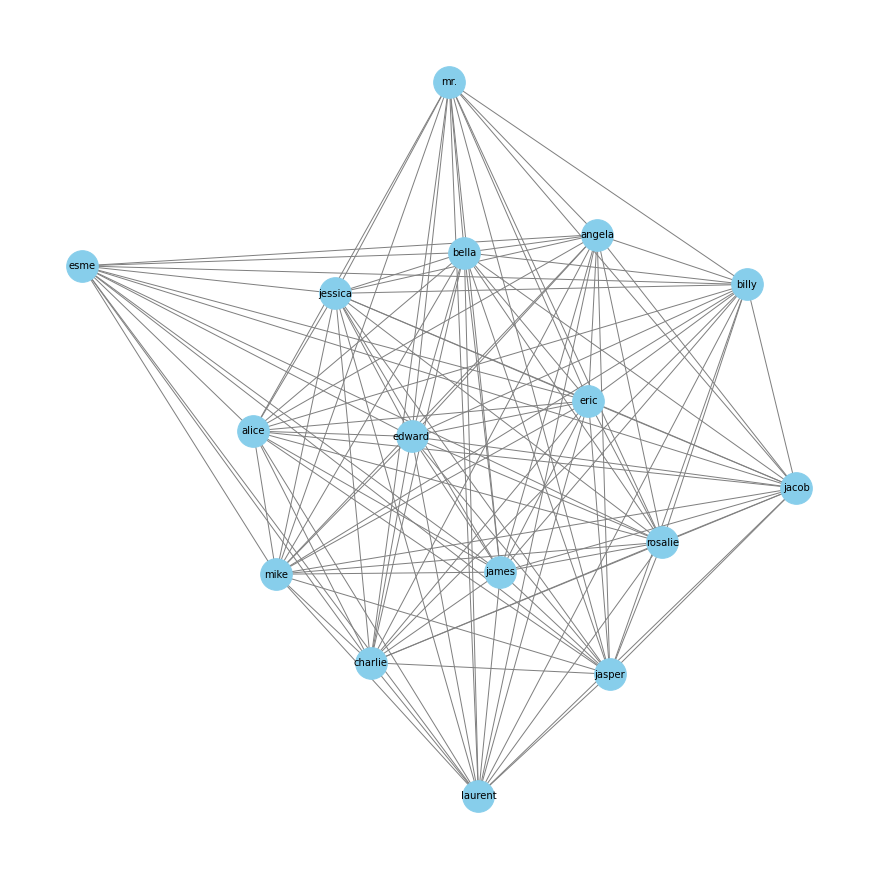

In [21]:
# visualize the network

plt.figure(figsize=(12, 12))
nx.draw(twilight_network, with_labels=True, font_size=10, node_size=1000, node_color='skyblue', edge_color='gray')
plt.show()